# K-Nearest Neighbors (K-NN)

## Importing the libraries

In [1]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
%matplotlib inline

import seaborn as sns
sns.set_theme()
sns.set_style('whitegrid')
sns.set_palette(['#3F7C85', '#FF5F5D', '#00CCBF', '#72F2EB', '#747E7E'])

# import warnings
# warnings.filterwarnings('ignore')

## Preprocessing and EDA

In [2]:
diabetes = pd.read_csv('datasets/diabetes.csv')

In [3]:
diabetes.shape

(768, 9)

In [4]:
diabetes.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [5]:
diabetes.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [6]:
diabetes.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [7]:
columns=["Glucose","BloodPressure","SkinThickness","BMI","Insulin"]

for i in columns:
    print('Number of zero value of ' + i, diabetes[diabetes[i]==0].shape[0])  

Number of zero value of Glucose 5
Number of zero value of BloodPressure 35
Number of zero value of SkinThickness 227
Number of zero value of BMI 11
Number of zero value of Insulin 374


In [26]:
for i in columns:
    diabetes[i] = diabetes[i].replace(0, np.NaN)
    mean = int(diabetes[i].mean(skipna=True))
    diabetes[i] = diabetes[i].replace(np.NaN, mean)

In [27]:
diabetes["Glucose"].mean()

121.68229166666667

In [28]:
diabetes["Outcome"].value_counts()

Outcome
0    500
1    268
Name: count, dtype: int64

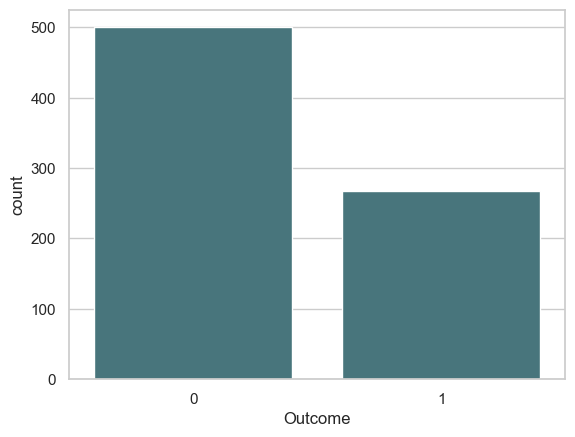

In [29]:
sns.countplot(diabetes, x='Outcome');

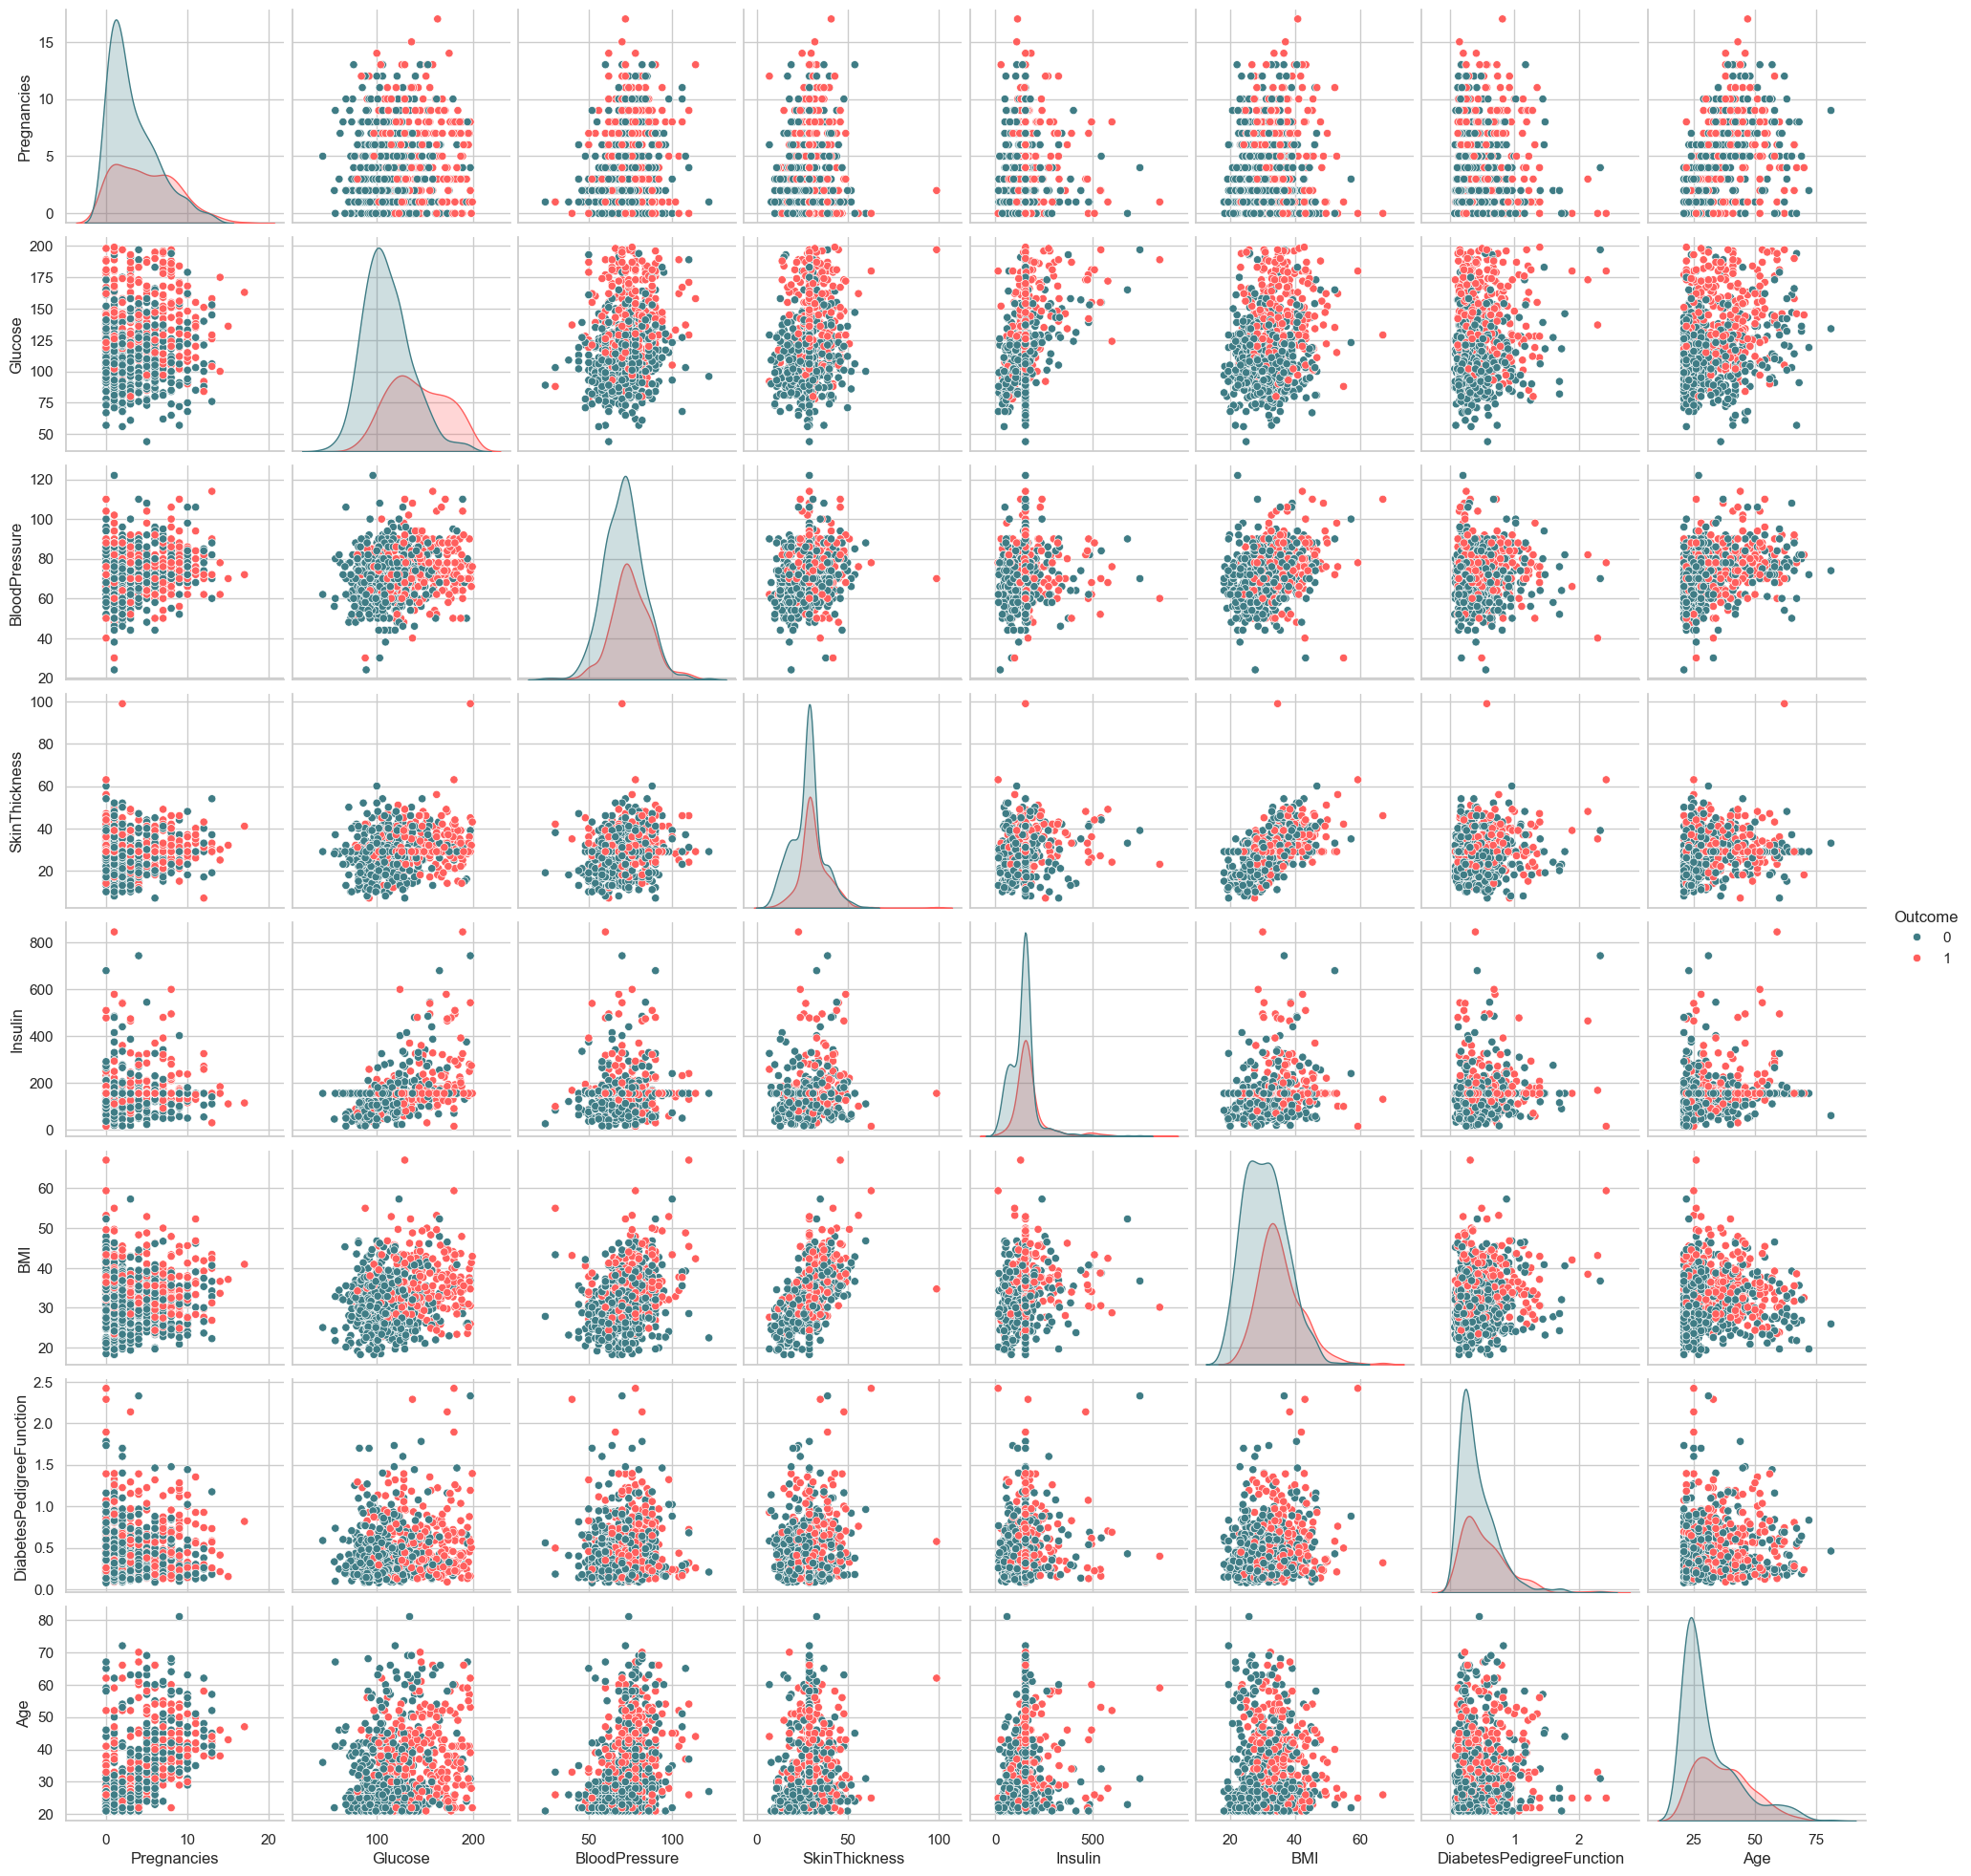

In [30]:
sns.pairplot(diabetes, hue="Outcome");

<Axes: >

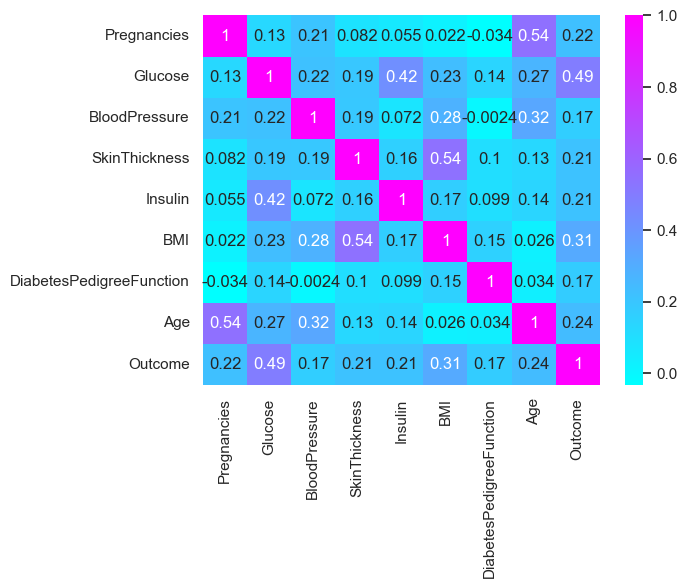

In [31]:
sns.heatmap(diabetes.corr(), cmap="cool", annot=True)

<Axes: xlabel='Glucose', ylabel='BMI'>

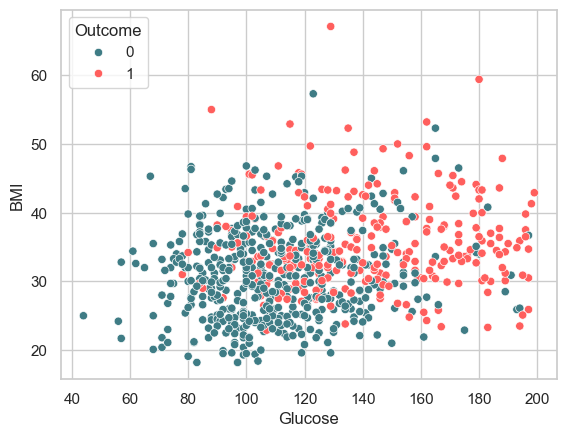

In [32]:
sns.scatterplot(x="Glucose", y="BMI", hue="Outcome", data=diabetes)

In [33]:
diabetic = diabetes[diabetes["Outcome"]==1]
adiabetic = diabetes[diabetes["Outcome"]==0]

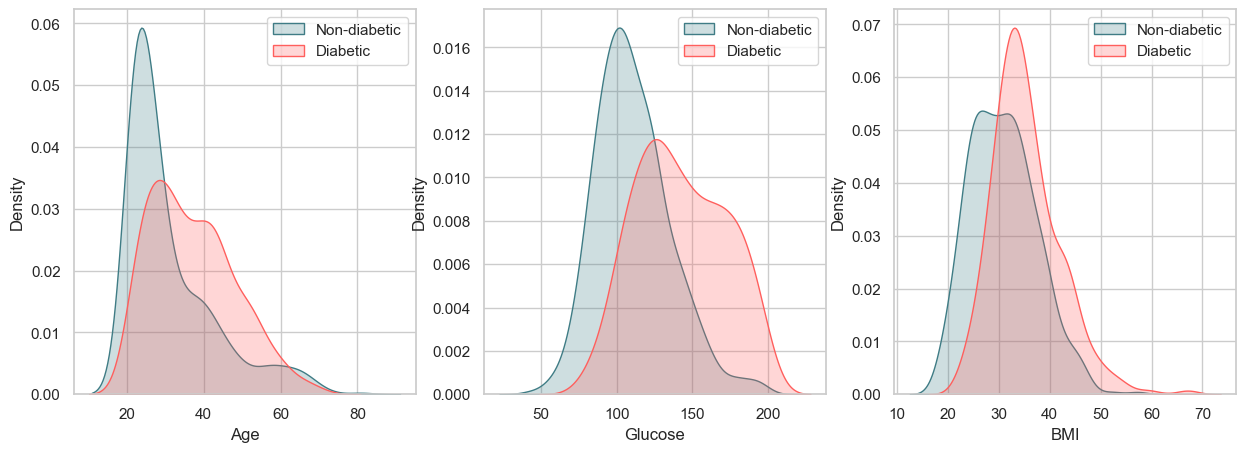

In [34]:
plt.figure(figsize=(15,5))
for idx, v in enumerate(['Age', 'Glucose', 'BMI']):
    plt.subplot(1, 3, idx+1)
    sns.kdeplot(x = v, data = adiabetic, label="Non-diabetic", fill=True)
    sns.kdeplot(x = v, data = diabetic, label="Diabetic", fill=True); 
    plt.legend()

<Axes: xlabel='Glucose', ylabel='BMI'>

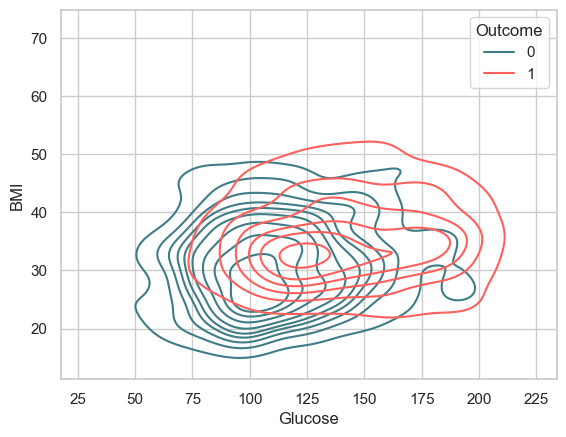

In [35]:
sns.kdeplot(x="Glucose", y="BMI", data=diabetes,hue="Outcome")

## Splitting the dataset into Training/ Test set

In [36]:
X = diabetes.iloc[:, :8]
y = diabetes.iloc[:, 8]

In [37]:
print(f"{X.shape=}")
print(f"{y.shape=}")

X.shape=(768, 8)
y.shape=(768,)


In [41]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 0)

In [42]:
X_train.shape, X_test.shape

((576, 8), (192, 8))

### Feature Scaling

In [45]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()

X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [46]:
print(f"{X_train.min(axis=0)}")
print("----------------------------------")
print(f"{X_train.max(axis=0)}")

[-1.12204091 -2.19912506 -3.61111136 -2.49143377 -1.65072202 -2.07210968
 -1.17597    -1.04923114]
----------------------------------
[3.8449684  2.53257476 4.14945369 7.77178595 7.96421814 4.93848118
 5.87605476 3.95372528]


## Fitting K-NN to the Training set

In [47]:
from sklearn.neighbors import KNeighborsClassifier
classifier = KNeighborsClassifier(n_neighbors = 5, 
#                                   metric = 'minkowski', 
#                                   p = 2
                                 )
classifier.fit(X_train, y_train)

KNeighborsClassifier()

## Predicting the Test set results

In [48]:
y_pred = classifier.predict(X_test)

## Evaluation

In [49]:
from sklearn.metrics import confusion_matrix

tn, fp, fn, tp = confusion_matrix(y_test, y_pred).ravel()
print(f"{tn=},{fp=},{fn=},{tp=}")

tn=113,fp=17,fn=26,tp=36


In [50]:
confusion_mat = confusion_matrix(y_test, y_pred)

<Axes: >

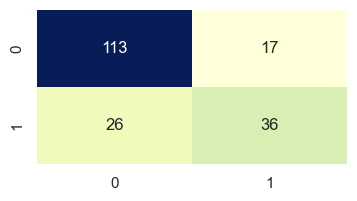

In [51]:
plt.figure(figsize=(4,2))
sns.heatmap(confusion_mat, annot=True, fmt="g", cbar=False, cmap="YlGnBu")

In [53]:
from sklearn.metrics import classification_report

print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.81      0.87      0.84       130
           1       0.68      0.58      0.63        62

    accuracy                           0.78       192
   macro avg       0.75      0.72      0.73       192
weighted avg       0.77      0.78      0.77       192



In [54]:
from sklearn.metrics import accuracy_score, precision_score, recall_score

print(f"Accuracy: {accuracy_score(y_test, y_pred):.4f}")
print(f"Precision: {precision_score(y_test, y_pred):.4f}")
print(f"Recall: {recall_score(y_test, y_pred):.4f}")

Accuracy: 0.7760
Precision: 0.6792
Recall: 0.5806


## Trying for different values of 'k'

In [55]:
neighbors = np.arange(1, 20)
train_accuracy = np.empty(len(neighbors))
test_accuracy = np.empty(len(neighbors))

In [56]:
for i, k in enumerate(neighbors):
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train, y_train)
    train_accuracy[i] = knn.score(X_train, y_train)
    test_accuracy[i] = knn.score(X_test, y_test)

In [72]:
test_accuracy

array([0.72916667, 0.72395833, 0.78125   , 0.78645833, 0.77604167,
       0.765625  , 0.77604167, 0.78125   , 0.78645833, 0.80208333,
       0.78645833, 0.78645833, 0.79166667, 0.78125   , 0.80208333,
       0.77604167, 0.77083333, 0.78125   , 0.75520833])

Text(0, 0.5, 'Accuracy')

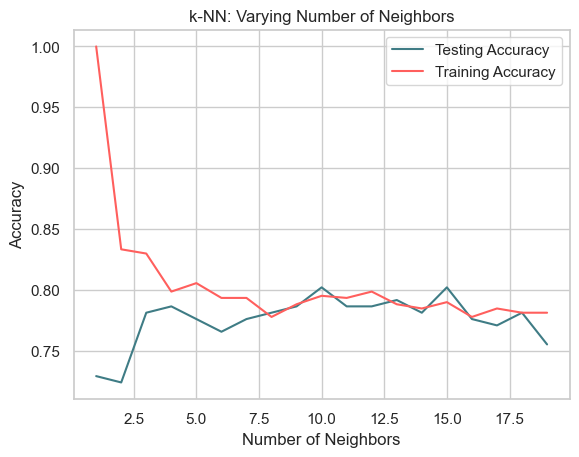

In [57]:
plt.title('k-NN: Varying Number of Neighbors')
plt.plot(neighbors, test_accuracy, label = 'Testing Accuracy')
plt.plot(neighbors, train_accuracy, label = 'Training Accuracy')
plt.legend()
plt.xlabel('Number of Neighbors')
plt.ylabel('Accuracy')

[0.2708333333333333, 0.2760416666666667, 0.21875, 0.21354166666666666, 0.22395833333333334, 0.234375, 0.22395833333333334, 0.21875, 0.21354166666666666, 0.19791666666666666, 0.21354166666666666, 0.21354166666666666, 0.20833333333333334, 0.21875, 0.19791666666666666, 0.22395833333333334, 0.22916666666666666, 0.21875, 0.24479166666666666, 0.23958333333333334, 0.23958333333333334, 0.22916666666666666, 0.23958333333333334, 0.24479166666666666, 0.24479166666666666, 0.24479166666666666, 0.22916666666666666, 0.22916666666666666, 0.22395833333333334]
Minimum error: 0.19791666666666666 at K = 9


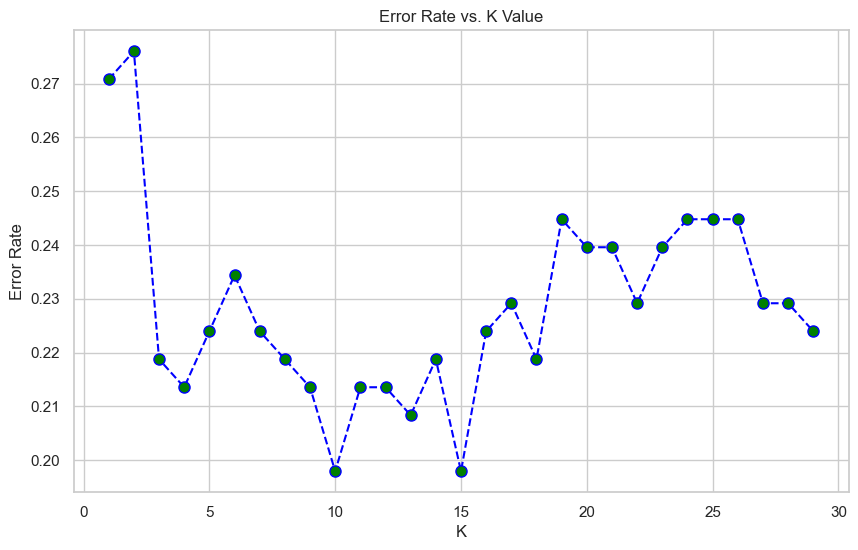

In [58]:
error_rate = []
for i in range(1,30):
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train,y_train)
    predct = knn.predict(X_test)
    error_rate.append(np.mean(predct != y_test))
print(error_rate)

plt.figure(figsize=(10,6))
plt.plot(range(1,30),error_rate,color='blue', linestyle='dashed', marker='o', markerfacecolor='green', markersize=8)
plt.title('Error Rate vs. K Value')
plt.xlabel('K')
plt.ylabel('Error Rate')
print("Minimum error:", min(error_rate), "at K =" , error_rate.index(min(error_rate)))

In [59]:
bknn = KNeighborsClassifier(n_neighbors=10)
bknn.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=10)

In [60]:
y_pred = bknn.predict(X_test)

<Axes: >

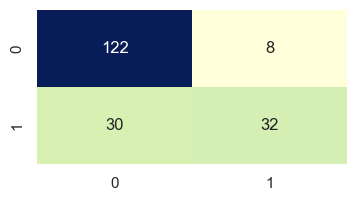

In [61]:
confusion_mat = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(4,2))
sns.heatmap(confusion_mat, annot=True, fmt="g", cbar=False, cmap="YlGnBu")

In [62]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.80      0.94      0.87       130
           1       0.80      0.52      0.63        62

    accuracy                           0.80       192
   macro avg       0.80      0.73      0.75       192
weighted avg       0.80      0.80      0.79       192



In [63]:
print(f"Accuracy: {accuracy_score(y_test, y_pred):.4f}")
print(f"Precision: {precision_score(y_test, y_pred):.4f}")
print(f"Recall: {recall_score(y_test, y_pred):.4f}")

Accuracy: 0.8021
Precision: 0.8000
Recall: 0.5161


## References

https://www.kaggle.com/code/kishanadhikary/diabetesclassificationusingknn
https://www.kaggle.com/datasets/mathchi/diabetes-data-set
https://towardsdatascience.com/building-a-k-nearest-neighbors-k-nn-model-with-scikit-learn-51209555453a
https://www.kaggle.com/code/kcsener/1-supervised-learning-tutorial